In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
import scipy
from scipy.stats import pearsonr

In [ ]:
producer_mixed_df=pd.read_csv('DK1_mixed.csv')
producer_mixed_df2=pd.read_csv('DK2_mixed.csv')
mixed_df=pd.read_csv('VA_mixed.csv')
df_2018=pd.read_csv('VA_2018.csv')
mixed_df

,Unnamed: 0,date,month,hour,values_2023,values_2022,values_2021,values_2020,values_2019,values_2018
0,0,1.0,1.0,0.0,5.6,5.6,5.6,5.6,5.6,5.6
1,1,1.0,1.0,1.0,3.2,4.4,5.6,6.8,8.0,9.2
2,2,1.0,1.0,2.0,3.2,4.4,5.6,6.8,8.0,9.2
3,3,1.0,1.0,3.0,5.2,5.2,5.2,5.2,5.2,5.2
4,4,1.0,1.0,4.0,10.8,8.4,6.0,3.6,1.2,-1.2
...,...,...,...,...,...,...,...,...,...,...
8755,8755,31.0,12.0,19.0,2.0,6.4,10.8,15.2,19.6,24.0
8756,8756,31.0,12.0,20.0,-1.6,4.4,10.4,16.4,22.4,28.4
8757,8757,31.0,12.0,21.0,-0.8,4.8,10.4,16.0,21.6,27.2
8758,8758,31.0,12.0,22.0,-1.2,4.4,10.0,15.6,21.2,26.8


In [ ]:
mixed_df=mixed_df.drop(columns='Unnamed: 0')

In [ ]:
producer_mixed_df=producer_mixed_df.drop(columns='Unnamed: 0')
producer_mixed_df2=producer_mixed_df2.drop(columns='Unnamed: 0')

In [ ]:
nan_in_2018=mixed_df['values_2023'].isna()
print(nan_in_2018)
nan_indices = mixed_df.isna().stack()[mixed_df.isna().stack()]
print("\nIndices of NaN values:")
print(nan_indices)

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: values_2023, Length: 8760, dtype: bool

Indices of NaN values:
Series([], dtype: bool)


In [ ]:
from scipy.stats import pearsonr

covariance_df = pd.DataFrame(columns=['date','month','hour','covariance_value_with_DK1','covariance_value_with_DK2'])
covariance_df['date'] = df_2018['date']
covariance_df['month'] = df_2018['month']
covariance_df['hour'] = df_2018['hour']
for i in range(0, 8760):
    row1 = mixed_df.iloc[i].drop(['month', 'date', 'hour']).astype(float)
    row2 = producer_mixed_df.iloc[i].drop(['month', 'date', 'hour']).astype(float)
    row3 = producer_mixed_df2.iloc[i].drop(['month', 'date', 'hour']).astype(float)
    covariance_df.loc[i, 'covariance_value_with_DK1'] = pearsonr(row1, row2)[0]
    covariance_df.loc[i, 'covariance_value_with_DK2'] = pearsonr(row1, row3)[0]
covariance_df.reset_index(drop=True, inplace=True)
covariance_df

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coeffic

,date,month,hour,covariance_value_with_DK1,covariance_value_with_DK2
0,1.0,1.0,0.0,NaN,NaN
1,1.0,1.0,1.0,0.184874,-0.811804
2,1.0,1.0,2.0,0.164347,-0.785533
3,1.0,1.0,3.0,NaN,NaN
4,1.0,1.0,4.0,-0.172009,0.827331
...,...,...,...,...,...
8755,31.0,12.0,19.0,NaN,NaN
8756,31.0,12.0,20.0,NaN,NaN
8757,31.0,12.0,21.0,NaN,NaN
8758,31.0,12.0,22.0,NaN,NaN


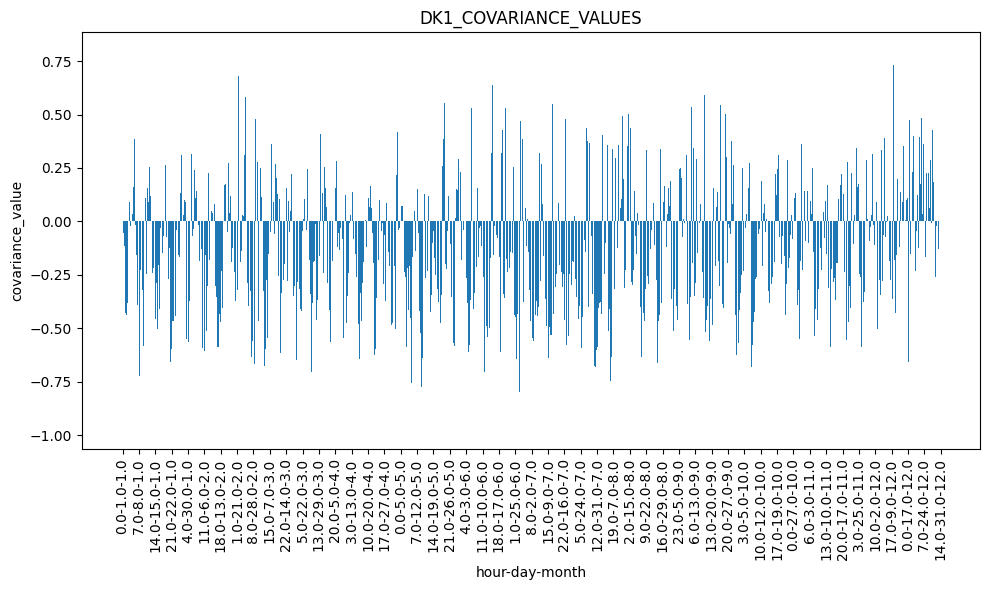

In [ ]:
#Plotting the Graphs(Histograms)
%matplotlib inline
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

x = covariance_df['hour'].astype(str) + "-" + covariance_df['date'].astype(str) + "-" + covariance_df['month'].astype(str)
y = covariance_df['covariance_value_with_DK1']

plt.bar(x, y)
plt.xlabel('hour-day-month')
plt.ylabel('covariance_value')
plt.title('DK1_COVARIANCE_VALUES')

# Reduce the number of x-axis ticks by specifying the step size
step_size = int(len(x) * 0.02)  # 10 percent of the total number of ticks
plt.xticks(range(0, len(x), step_size), x[::step_size], rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

x = covariance_df['hour'].astype(str) + "-" + covariance_df['date'].astype(str) + "-" + covariance_df['month'].astype(str)
y = covariance_df['covariance_value_with_DK2']

plt.bar(x, y)
plt.xlabel('hour-day-month')
plt.ylabel('covariance_value')
plt.title('DK2_COVARIANCE_VALUES')

# Reduce the number of x-axis ticks by specifying the step size
step_size = int(len(x) * 0.02)  # 10 percent of the total number of ticks
plt.xticks(range(0, len(x), step_size), x[::step_size], rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.show()

In [ ]:
# Calculating Bins
def process(a):
  if np.isnan(a):
    return 'NaN'
  if (a<=-0.7):
    return 'very strong negative'
  elif (a<=-0.5 and a>=-0.7):
    return 'strong negative'
  elif (a<=-0.3 and a>=-0.5):
    return 'moderate negative'
  elif(a<=0 and a>=-0.3):
    return 'weak negative'
  elif(a<=0.3 and a>=0):
    return 'weak positive'
  elif(a<=0.5 and a>=0.3):
    return 'moderate positive'
  elif(a<=0.7 and a>=0.5):
    return 'strong positive'
  else:
    return 'very strong positive'

In [ ]:
covariance_df['strength_with_DK1']='0'
covariance_df['strength_with_DK2']='0'
for i in range (0,8760):
  covariance_df.loc[i,'strength_with_DK1']=process(covariance_df['covariance_value_with_DK1'].iloc[i])
  covariance_df.loc[i,'strength_with_DK2']=process(covariance_df['covariance_value_with_DK2'].iloc[i])

<function matplotlib.pyplot.show(close=None, block=None)>

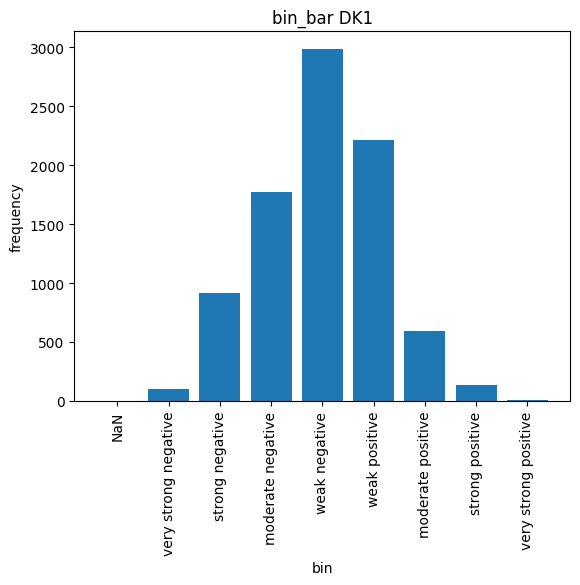

In [ ]:
import matplotlib.pyplot as plt
x=['NaN','very strong negative','strong negative','moderate negative','weak negative','weak positive','moderate positive','strong positive','very strong positive']
y=[(covariance_df['strength_with_DK1']=='Nan').sum(),(covariance_df['strength_with_DK1']=='very strong negative').sum(),
 (covariance_df['strength_with_DK1']=='strong negative').sum(),(covariance_df['strength_with_DK1']=='moderate negative').sum(),(covariance_df['strength_with_DK1']=='weak negative').sum(),(covariance_df['strength_with_DK1']=='weak positive').sum(),(covariance_df['strength_with_DK1']=='moderate positive').sum(),(covariance_df['strength_with_DK1']=='strong positive').sum(),(covariance_df['strength_with_DK1']=='very strong positive').sum()]
plt.bar(x,y)
plt.xlabel('bin')
plt.ylabel('frequency')
plt.title('bin_bar DK1')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

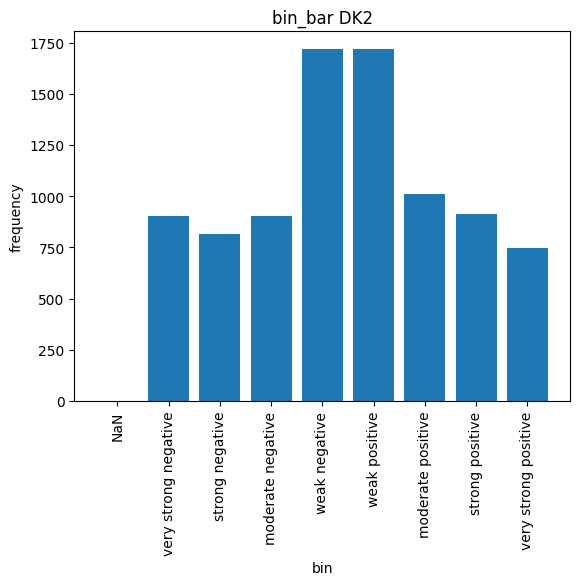

In [ ]:
import matplotlib.pyplot as plt
x=['NaN','very strong negative','strong negative','moderate negative','weak negative','weak positive','moderate positive','strong positive','very strong positive']
y=[(covariance_df['strength_with_DK2']=='Nan').sum(),(covariance_df['strength_with_DK2']=='very strong negative').sum(),
 (covariance_df['strength_with_DK2']=='strong negative').sum(),(covariance_df['strength_with_DK2']=='moderate negative').sum(),(covariance_df['strength_with_DK2']=='weak negative').sum(),(covariance_df['strength_with_DK2']=='weak positive').sum(),(covariance_df['strength_with_DK2']=='moderate positive').sum(),(covariance_df['strength_with_DK2']=='strong positive').sum(),(covariance_df['strength_with_DK2']=='very strong positive').sum()]
plt.bar(x,y)
plt.xlabel('bin')
plt.ylabel('frequency')
plt.title('bin_bar DK2')
plt.xticks(rotation=90)
plt.show

In [ ]:
#Highest R value Finding throughout the year
covariance_df['covariance_value_with_DK1']=covariance_df['covariance_value_with_DK1'].astype(float)
top_5_max_values=covariance_df['covariance_value_with_DK1'].nlargest(5)
top_5_Max_indices=top_5_max_values.index
top_5_Max_indices

Index([5022, 4399, 3585, 8247, 8248], dtype='int64')

In [ ]:
def make_graph(i):
  x=np.array([mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]])
  y=np.array([producer_mixed_df['2018_values'].iloc[i],producer_mixed_df['2019_values'].iloc[i],producer_mixed_df['2020_values'].iloc[i],producer_mixed_df['2021_values'].iloc[i],producer_mixed_df['2022_values'].iloc[i],producer_mixed_df['2023_values'].iloc[i]])
  plt.scatter(x,y)
  slope,intercept,rvalue,pvalue,stderr=linregress(x,y)
  plt.plot(x,slope*x+intercept)
  plt.title(f"{mixed_df['date'].iloc[i]},{mixed_df['month'].iloc[i]},{mixed_df['hour'].iloc[i]} with {covariance_df['covariance_value_with_DK1'].iloc[i]} covariance value with DK1")
  plt.savefig(f"graph_{i}.png")
  plt.show()

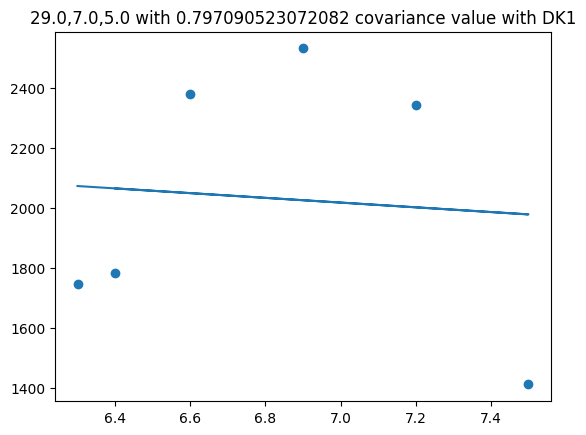

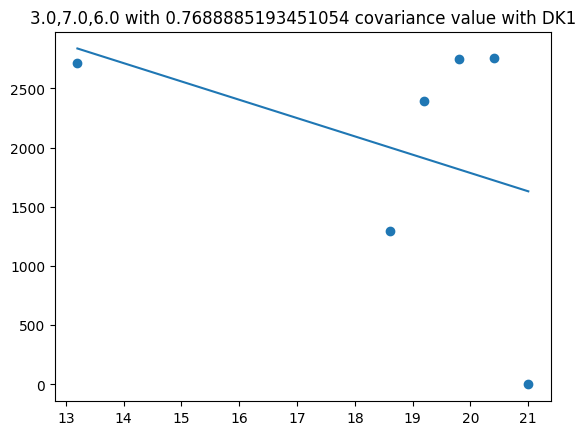

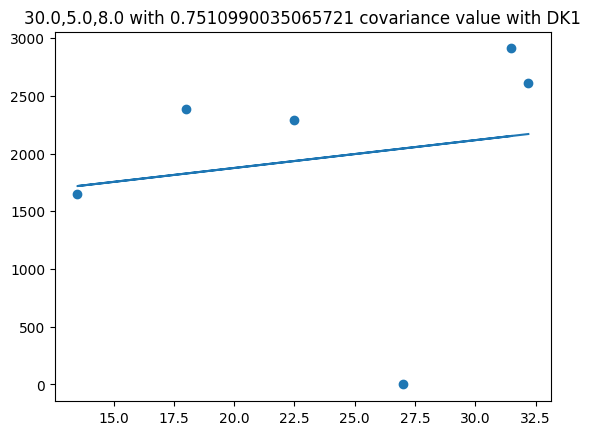

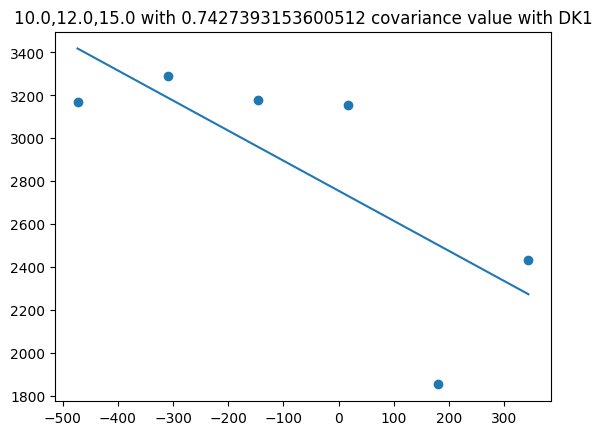

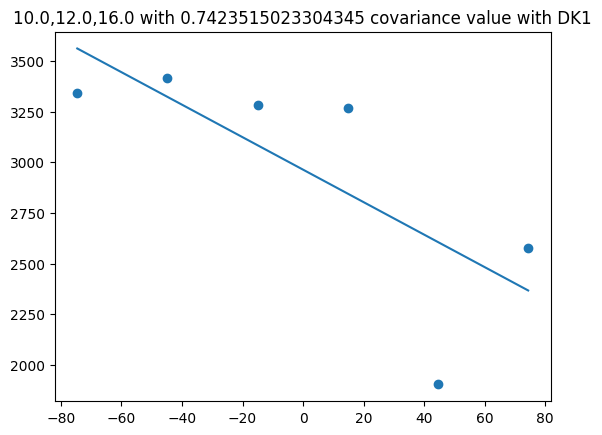

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy.stats import linregress
!pip install scipy
for i in range (0,5):
  make_graph(top_5_Max_indices[i])

In [ ]:
covariance_df['covariance_value_with_DK2']=covariance_df['covariance_value_with_DK2'].astype(float)
top_5_max_values2=covariance_df['covariance_value_with_DK2'].nlargest(5)
top_5_Max_indices2=top_5_max_values2.index
top_5_Max_indices2

Index([40, 2569, 2544, 4123, 2639], dtype='int64')

In [ ]:
def make_graph(i):
  x=np.array([mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]])
  y=np.array([producer_mixed_df2['2018_values'].iloc[i],producer_mixed_df2['2019_values'].iloc[i],producer_mixed_df2['2020_values'].iloc[i],producer_mixed_df2['2021_values'].iloc[i],producer_mixed_df2['2022_values'].iloc[i],producer_mixed_df2['2023_values'].iloc[i]])
  plt.scatter(x,y)
  slope,intercept,rvalue,pvalue,stderr=linregress(x,y)
  plt.plot(x,slope*x+intercept)
  plt.title(f"{mixed_df['date'].iloc[i]},{mixed_df['month'].iloc[i]},{mixed_df['hour'].iloc[i]} with {covariance_df['covariance_value_with_DK2'].iloc[i]} covariance value with DK2")
  plt.savefig(f"graph_{i}.png")
  plt.show()

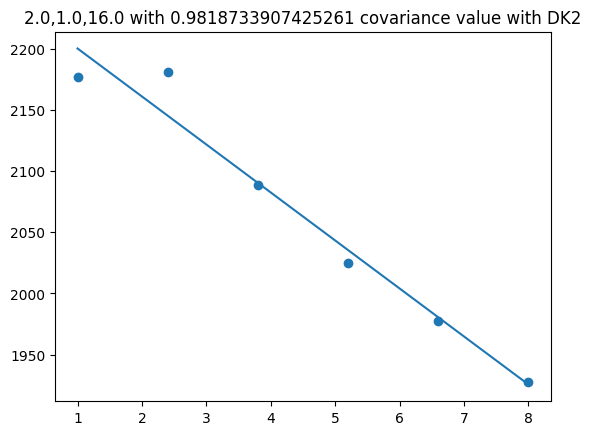

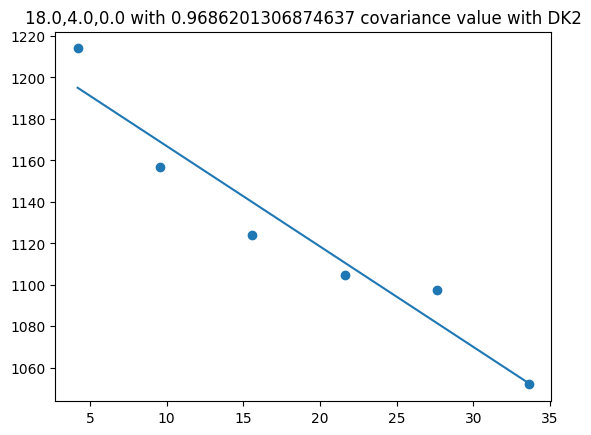

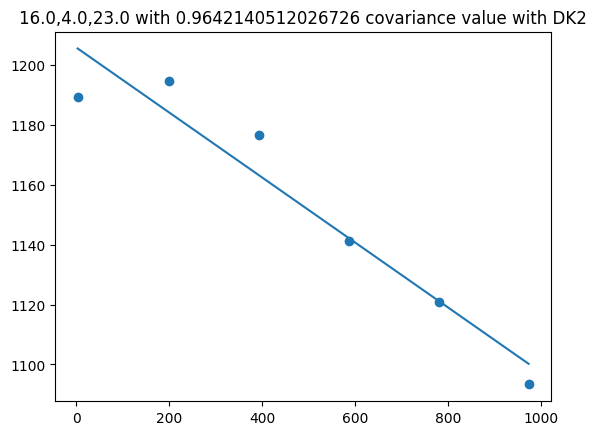

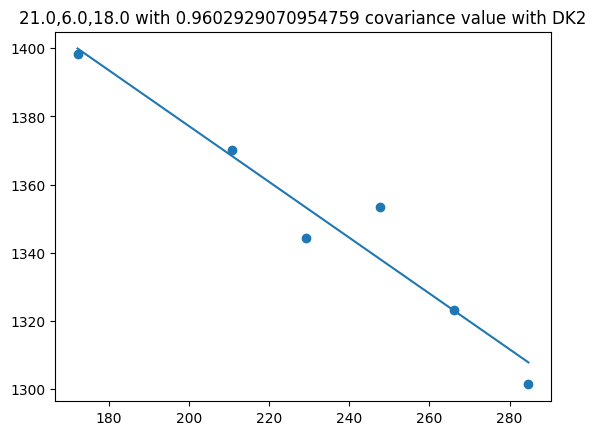

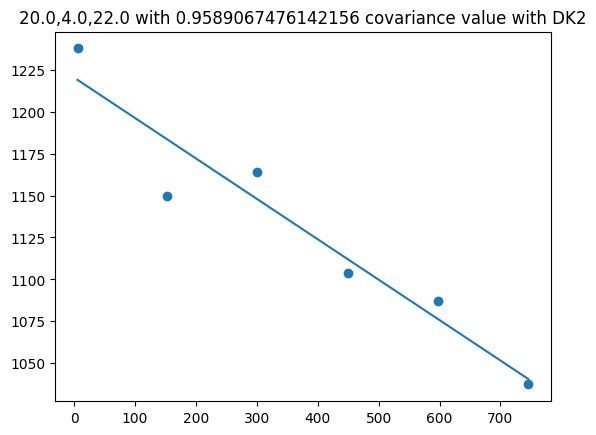

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy.stats import linregress
!pip install scipy
for i in range (0,5):
  make_graph(top_5_Max_indices2[i])

In [ ]:
covariance_df.to_csv('VA_covariance.csv')